# Adventures in Analysis
Evelyn the Experimentalist has some data that she needs your help to analyze. Let's put your Python skills to action!

The two main libraries we will use are `numpy` and `matplotlib.pylot`. Let's import them here. For convenience, we can import them with aliases so that we save some keystrokes going forward.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Loading data

`numpy` has functions to load data of various forms. Your data for today is stored in `"SampleFiles/test_data.txt"` and consists of two columns: times and datapoints. Use a `numpy` function to load the data (and store it in a variable called `data`). If you get stuck, keep scrolling down...

In [2]:
np.loadtxt("SampleFiles/test-data.txt")

ValueError: could not convert string 'Time' to float64 at row 0, column 1.

You might have gotten an error about
> ValueError: could not convert string 'Time' to float64 at row 0, column 1.

This is because we have a header in our data file, which we want to ignore. Conveniently, there is an option to skip some number of rows when loading data into numpy; find this option and use it!

In [4]:
data = np.loadtxt("SampleFiles/test-data.txt", skiprows=1)

Alternatively, you could have used the file manipulation tricks from `MoreAdvancedIntro.ipynb` to load the data manually and store it in an array. It's simpler to use built-in functions when possible, though.

## Basic plotting and filtering

Great, now you've loaded your data into the notebook. Use a function from `matplotlib.pyplot` (which we loaded as `plt`) to plot your data.

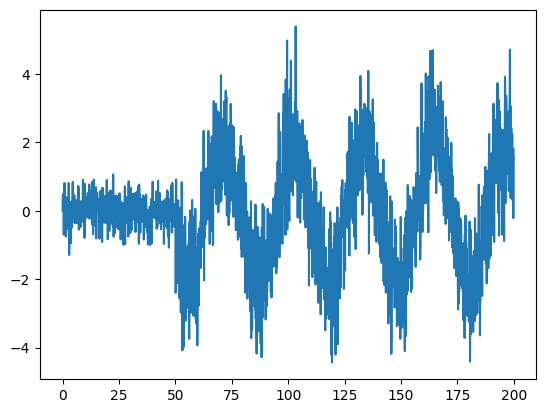

In [5]:
plt.plot(data[:,0], data[:,1])

Based on the instrument settings, you know that data collection on your sample only begins at $t=50$. Filter your data to include only points after $t=50$.

Plot the filtered data to check yourself.

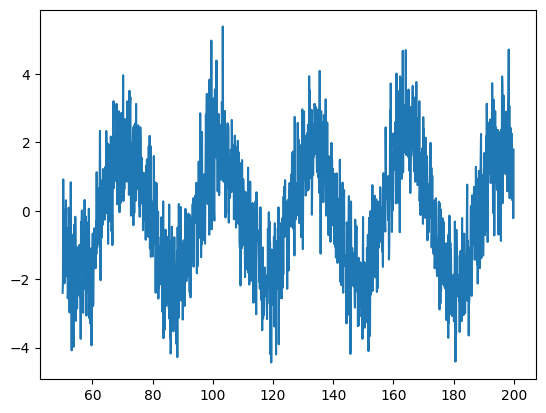

In [6]:
filter_idx = np.where(data[:,0] > 50)
x = data[filter_idx, 0].flatten()
y = data[filter_idx, 1].flatten()
plt.plot(x, y)

## Curve optimization

Now that you've filtered your data, let's fit it to a curve. The function `scipy.optimize.curve_fit` does what we want. Let's import it and look at how it works.

In [7]:
from scipy.optimize import curve_fit

In [8]:
?curve_fit

Signature:
curve_fit(
    f,
    xdata,
    ydata,
    p0=None,
    sigma=None,
    absolute_sigma=False,
    check_finite=True,
    bounds=(-inf, inf),
    method=None,
    jac=None,
    *,
    full_output=False,
    **kwargs,
)
Docstring:
Use non-linear least squares to fit a function, f, to data.

Assumes ``ydata = f(xdata, *params) + eps``.

Parameters
----------
f : callable
    The model function, f(x, ...). It must take the independent
    variable as the first argument and the parameters to fit as
    separate remaining arguments.
xdata : array_like or object
    The independent variable where the data is measured.
    Should usually be an M-length sequence or an (k,M)-shaped array for
    functions with k predictors, but can actually be any object.
ydata : array_like
    The dependent data, a length M array - nominally ``f(xdata, ...)``.
p0 : array_like, optional
    Initial guess for the parameters (length N). If None, then the
    initial values will all be 1 (if the number 

Note that the first argument `f` is a function that you must define with parameters. Choose a functional form that seems to fit your suspiciously clean data.

In [9]:
def func(x, a, b, c, d):
    return a*np.sin(b*(x-c)) + d

Now use `curve_fit` to find optimal parameters for your function. Note the outputs of the function.

Plot both your raw data and the curve that was fit for comparison.

In [10]:
popt, pcov = curve_fit(func, x, y)
print(popt)

[ 0.1223273   0.97402114 -3.48755826 -0.05281055]


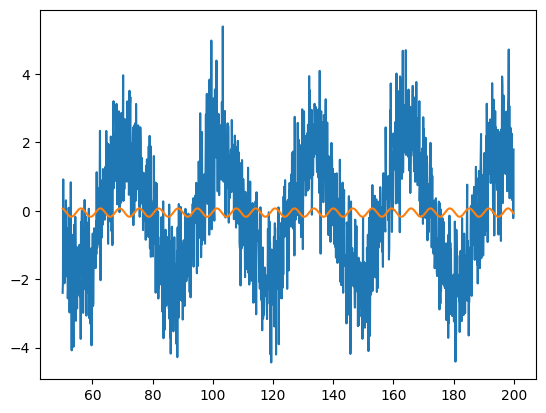

In [11]:
plt.plot(x, y)
plt.plot(x, func(x, *popt))

You probably got a terrible fit. Note that you can give `curve_fit` a guess for parameters from which it will further optimize the fit. This is often necessary when your parameters differ dramatically from the defaults (all 1). Try inputting a guess of initial parameters.

In [12]:
popt, pcov = curve_fit(func, x, y, p0=[1, 0.2, 0, 0])
print(popt)

[ 2.00516548  0.20117321  0.79883691 -0.04079038]


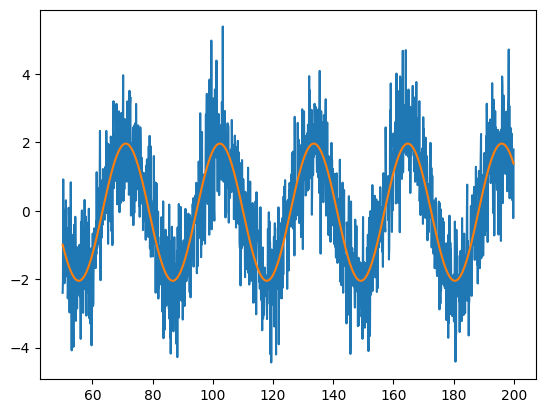

In [13]:
plt.plot(x, y)
plt.plot(x, func(x, *popt))

That should have been a much better fit!

## Making your figures better

You can customize `matplotlib` parameters like font, font size, colors, etc. Let's work through a few simple ones. Explore more of them at your leisure!

First, you should label your axes. Label your x-axis as `Time` and y-axis as `Voltage` (for example).

Text(0, 0.5, 'Voltage')

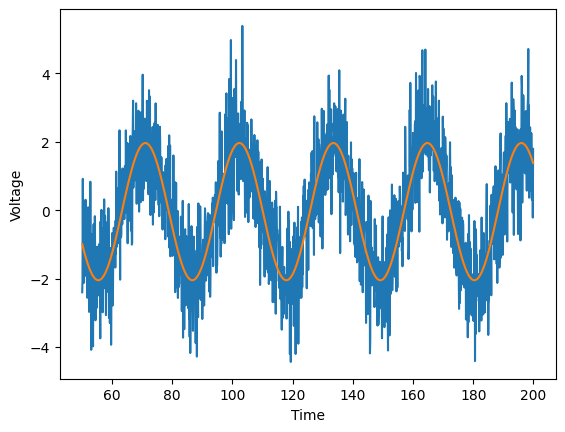

In [14]:
plt.plot(x, y)
plt.plot(x, func(x, *popt))
plt.xlabel("Time")
plt.ylabel("Voltage")

You should also label your curves. Please label the raw data as `Raw` and the fitted curve as `Fit`. Place the legend in the upper left corner of your figure.

Text(0, 0.5, 'Voltage')

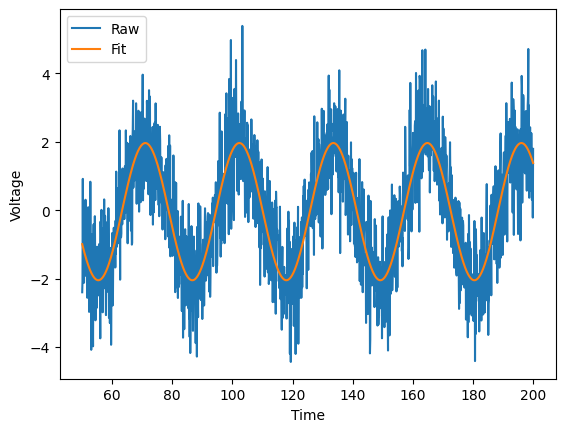

In [15]:
plt.plot(x, y, label="Raw")
plt.plot(x, func(x, *popt), label='Fit')
plt.legend(loc='upper left')
plt.xlabel("Time")
plt.ylabel("Voltage")

It's best to plot raw data as points rather than connecting them with arbitrary lines. Sometimes it's also hard to see two different sets of data plotted on the same graph.

Please plot the raw data as points, and increase the width of the fitted curve line.

Text(0, 0.5, 'Voltage')

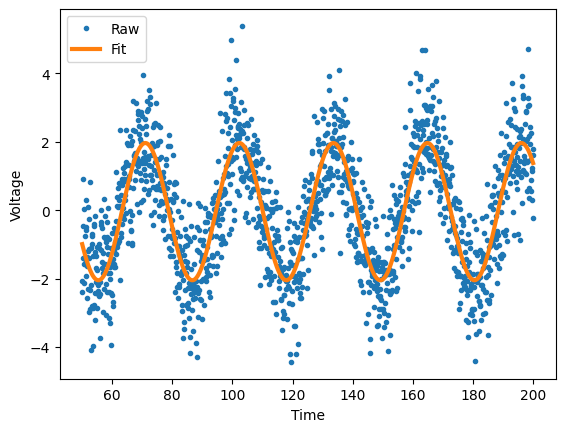

In [16]:
plt.plot(x, y, '.', label="Raw")
plt.plot(x, func(x, *popt), linewidth=3, label='Fit')
plt.legend(loc='upper left')
plt.xlabel("Time")
plt.ylabel("Voltage")

Finally, your colleagues at the back of the seminar room will thank you for making your fonts much bigger. Please plot the same data and curve fit with font size `24`.

In [19]:
plt.rcParams.update({
    "font.size": 24
})

Text(0, 0.5, 'Voltage')

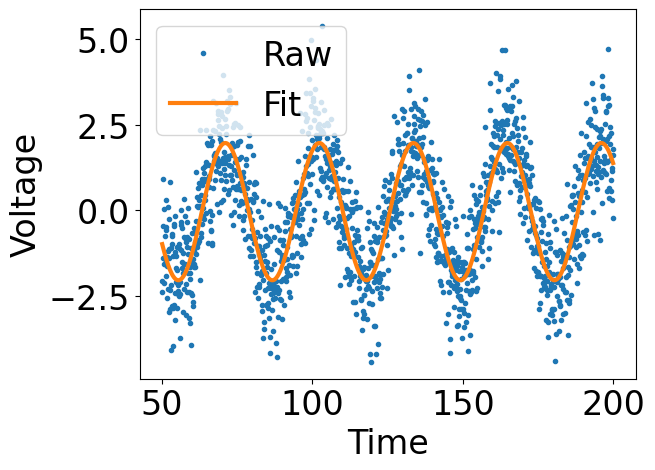

In [20]:
plt.plot(x, y, '.', label="Raw")
plt.plot(x, func(x, *popt), linewidth=3, label='Fit')
plt.legend(loc='upper left')
plt.xlabel("Time")
plt.ylabel("Voltage")